In [2]:
%run setup.ipynb
%matplotlib inline
import hapclust
import cartopy; print('cartopy', cartopy.__version__)
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
import pickle as peterpickedapickledpepper

cartopy 0.15.1


### setup cartopy

In [3]:
#grabbed these from ag1000g meta - no need to bring in the meta data file
df_lonlat = pd.DataFrame()
df_lonlat['pop'] = ['AOM', 'BFM', 'BFS', 'CMS', 'GAS', 'GNS', 'GWA', 'KES', 'UGS']
df_lonlat['longitude'] = [13.291000, -4.413900, -4.413900, 13.936844, 9.455000, -9.675065, -15.582000, 39.824614, 34.026000]
df_lonlat['latitude'] = [-8.821000, 11.206500,11.206500, 4.937851, 0.384000, 8.887097, 11.891000, -3.702068, 0.770000]
df_lonlat = df_lonlat.set_index('pop')

In [4]:
#check
for country, row in df_lonlat.iterrows():
    print(country, row.latitude, row.longitude)

AOM -8.821 13.291
BFM 11.2065 -4.4139
BFS 11.2065 -4.4139
CMS 4.937851 13.936844
GAS 0.384 9.455
GNS 8.887097 -9.675065
GWA 11.891 -15.582
KES -3.702068 39.824614
UGS 0.77 34.026


In [5]:
crs_lonlat = ccrs.PlateCarree()
ratios=np.asarray([0.5, 0.5])
sum(ratios)

1.0

### setup data

In [6]:
tbl_haplotypes = etl.fromtsv('../data/ag1000g.phase1.AR3.1.haplotypes.meta.txt')
hap_pops = np.array(tbl_haplotypes.values('population'))
# need to use named colors for graphviz
pop_colors = {
    'AOM': 'brown',
    'BFM': 'firebrick1',
    'GWA': 'goldenrod1',
    'GNS': 'cadetblue1',
    'BFS': 'deepskyblue',
    'CMS': 'dodgerblue3',
    'UGS': 'palegreen',
    'GAS': 'olivedrab',
    'KES': 'grey47',
    'colony': 'black'
}
#associates pop colours with haps
hap_colors = np.array([pop_colors[p] for p in hap_pops])

#haplogroup indices generated in Figure_1a_Clado_SM.ipynb
with open('../data/clust_dict.pickle', 'rb') as handle:
    clus_dict = peterpickedapickledpepper.load(handle)

sorted(clus_dict.keys())

['F1', 'F2', 'F3', 'F4', 'F5', 'L1', 'L2', 'S1', 'S2', 'S3', 'S4/5']

## calculate haplogroup frequencies across populations

In [7]:
#COUNT HAPS - make lists (columns) for each cluster so that we can turn these into a df 

#first set up empty array with 0s
arr = np.zeros([10,11], dtype=int)
pclu = list(np.unique(hap_pops))

#then loop through haplogroup clusters
for hg in sorted(clus_dict.keys()):
    hg_pops = hap_pops.take(list(clus_dict[hg]))
    unique, counts = np.unique(hg_pops, return_counts=True)
    clus_index = list(sorted(clus_dict.keys())).index(hg) #this just gives on of the coordinates for the array
    
    #then loop through populations present in that haplogroup cluster
    for u, c in zip(unique, counts):
        pop_index = pclu.index(u) # this gives the other coordinate
        arr[pop_index, clus_index] = c
        #print(clus_index,cov, u, pop_index, c)


In [8]:
#check
arr

array([[ 91,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [113,   0,   0,   0,   0,   0,  18,   0,   0,   0,   0],
       [162,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 33,  13,  51,  26, 173,   0,   0,   0,   8,   0,  73],
       [  0,   0,   0,  16,  24,   0,   0,   0,  71,   0,   0],
       [ 62,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  16,   0,   0,   0,  64,   0],
       [  0,   0,   0,   0,   0,   0,   0, 108,   0,  98,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]])

In [9]:
# we need to know the total number of haplotypes at each site to sort out pie chart size and proportions
unique, counts = np.unique(hap_pops, return_counts=True)
for u, c in zip(unique, counts):
    print(u, c)
print("total =",sum(counts), ".   total - colony =", sum(counts)-16)

AOM 120
BFM 138
BFS 162
CMS 550
GAS 112
GNS 62
GWA 92
KES 88
UGS 206
colony 16
total = 1546 .   total - colony = 1530


In [10]:
#make df for plotting
hap_freq_df = pd.DataFrame(data=arr, index=list(np.unique(hap_pops)), columns=list(sorted(clus_dict.keys())))
hap_freq_df['wildtype'] = counts - list(hap_freq_df.sum(axis=1))
hap_freq_df['total'] = counts
hap_freq_df

,F1,F2,F3,F4,F5,L1,L2,S1,S2,S3,S4/5,wildtype,total
AOM,91,0,0,0,0,0,0,0,0,0,0,29,120
BFM,113,0,0,0,0,0,18,0,0,0,0,7,138
BFS,162,0,0,0,0,0,0,0,0,0,0,0,162
CMS,33,13,51,26,173,0,0,0,8,0,73,173,550
GAS,0,0,0,16,24,0,0,0,71,0,0,1,112
GNS,62,0,0,0,0,0,0,0,0,0,0,0,62
GWA,0,0,0,0,0,0,0,0,0,0,0,92,92
KES,0,0,0,0,0,16,0,0,0,64,0,8,88
UGS,0,0,0,0,0,0,0,108,0,98,0,0,206
colony,0,0,0,0,0,0,0,0,0,0,0,16,16


## build matplotlib pies - use colours from original dendrogram

In [11]:
#from df make 11 slice pie chart proportions (total = 1) for each country
#we need pie colours

In [27]:
highlight_colors = sns.color_palette('spectral', n_colors=11, desat=0.5)
#add a final colour for wt - see what this looks like
highlight_colors.append((0.250, 0.250, 0.250))
#check
highlight_colors

[(0.39901176470588234, 0.14411470588235298, 0.43234411764705882),
 (0.18138088235294114, 0.18138088235294114, 0.54414264705882354),
 (0.21667499999999995, 0.45133186274509773, 0.65002500000000007),
 (0.18334166666666674, 0.50557499999999966, 0.55002499999999999),
 (0.1614436274509804, 0.48433088235294119, 0.34443872549019638),
 (0.18463284313725492, 0.55389852941176465, 0.18463284313725492),
 (0.23954509803921575, 0.71863529411764704, 0.23954509803921575),
 (0.64442500000000014, 0.733325, 0.24444166666666667),
 (0.75, 0.64411764705882357, 0.25),
 (0.75, 0.33823529411764708, 0.25),
 (0.63236911764705894, 0.21078970588235291, 0.21078970588235291),
 (0.25, 0.25, 0.25)]

In [28]:
df_lonlat

,longitude,latitude
pop,,
AOM,13.291000,-8.821000
BFM,-6.413900,15.206500
BFS,-2.000000,15.206500
CMS,13.936844,4.937851
GAS,9.455000,0.384000
GNS,-9.675065,8.887097
GWA,-15.582000,11.891000
KES,39.824614,-3.702068
UGS,34.026000,0.770000


In [29]:
#wiggle BFM and BFS lom/lat about so we can see both
df_lonlat = pd.DataFrame()
df_lonlat['pop'] = ['AOM', 'BFM', 'BFS', 'CMS', 'GAS', 'GNS', 'GWA', 'KES', 'UGS']
df_lonlat['longitude'] = [13.291000, -6.413900, -2, 13.936844, 9.455000, -9.675065, -15.582000, 39.824614, 34.026000]
df_lonlat['latitude'] = [-8.821000, 15.206500, 15.206500, 4.937851, 0.384000, 8.887097, 11.891000, -3.702068, 0.770000]
df_lonlat = df_lonlat.set_index('pop')
df_lonlat

,longitude,latitude
pop,,
AOM,13.291000,-8.821000
BFM,-6.413900,15.206500
BFS,-2.000000,15.206500
CMS,13.936844,4.937851
GAS,9.455000,0.384000
GNS,-9.675065,8.887097
GWA,-15.582000,11.891000
KES,39.824614,-3.702068
UGS,34.026000,0.770000


In [30]:
#for legend
kdr_colors = {
    'F1': highlight_colors[0],
    'F2': highlight_colors[1],
    'F3': highlight_colors[2],
    'F4': highlight_colors[3],
    'F5': highlight_colors[4],
    'L1': highlight_colors[5],
    'L2': highlight_colors[6],
    'S1': highlight_colors[7],
    'S2': highlight_colors[8],
    'S3': highlight_colors[9],
    'S4/5': highlight_colors[10],
    'wt': highlight_colors[11]
}

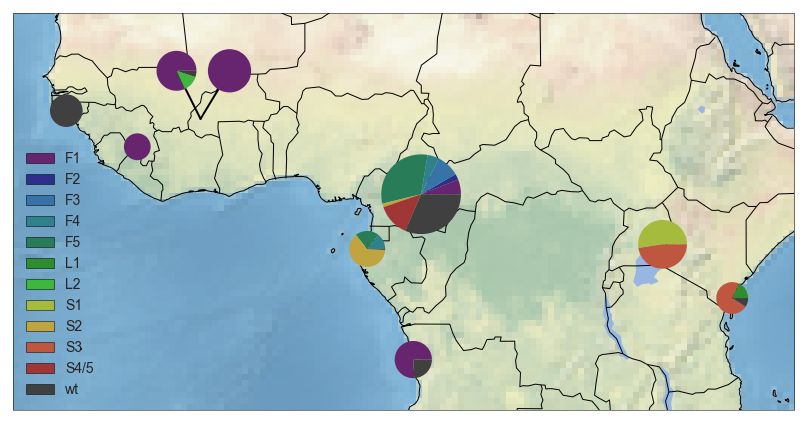

In [31]:
#our frame
extent_lonlat = (-20, 45, -13, 20)

#plot
subplot_kw = dict(projection=crs_lonlat)
fig, ax = plt.subplots(figsize=(14, 14), subplot_kw=subplot_kw)
ax.coastlines(resolution='50m', linewidth=.2, zorder=1)
ax.stock_img()
ax.add_feature(cfeature.BORDERS, lw=.6, zorder=4)
ax.add_feature(cfeature.LAKES)
#ax.margins(0)

#add pies
for pop, row in df_lonlat.iterrows():
    #ax.add_patch(plt.Circle((row.longitude, row.latitude), radius=5, color='k'))
    freqs = hap_freq_df.loc[pop]
    ratios = np.asarray([freqs[i]/freqs[12] for i in range(12)])
    #wedgeprops is used here just to pass the zorder command
    ax.pie(ratios, wedgeprops=dict(zorder=5),  colors=highlight_colors, center=(row.longitude, row.latitude), radius=np.sqrt(hap_freq_df.loc[pop][12] * .02))
    
    

ax.set_extent(extent_lonlat, crs=crs_lonlat)

#add lines to BF orgin lonlat
ax.plot([-4.413900, -6.413900], [11.206500, 15.206500], 'k-', linewidth=2)
ax.plot([-4.413900, -2], [11.206500, 15.206500], 'k-', linewidth=2)

#legend
handles = [mpl.patches.Patch(facecolor=v, edgecolor='k', label=k) for k, v in sorted(kdr_colors.items())]
ax.legend(handles=handles, loc='lower left', prop={'size':14})

#save
fn = '../artwork/Figure_1b_Map.jpeg'
fig.savefig(fn, jpeg_quality=100, dpi=300, bbox_inches='tight');

#save
fn = '../artwork/Figure_1b_Map.svg'
fig.savefig(fn, bbox_inches='tight')

# TO DO
- use t_hat distributions to infer direction of movement - arrows? - remember one pop is much older...